In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

In [2]:
def transformX(xy, alpha, beta, gamma, theta, phi, psi, z):
    xout = gamma*(xy[:,0]*np.cos(theta) - xy[:,1]*np.sin(theta) + alpha)
    xout = 1./z*np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*xout
#    xout = z/np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*xout
    return xout

def transformY(xy, alpha, beta, gamma, theta, phi, psi, z):
    yout = gamma*(xy[:,0]*np.sin(theta) + xy[:,1]*np.cos(theta) + beta)
    yout = 1./z*np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*yout
#    yout = z/np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*yout
    return yout

In [3]:
def poly2ModelX(data):
    Xtrain1 = data['outputEvalNopolX'].values.reshape(data['outputEvalNopolX'].values.shape[0],1)
    Xtrain2 = data['outputEvalNopolY'].values.reshape(data['outputEvalNopolY'].values.shape[0],1)
    Ones = np.ones(Xtrain1.shape)

    Xtrain = np.concatenate((Ones, Xtrain1, Xtrain2, Xtrain1*Xtrain1, Xtrain2*Xtrain2, Xtrain1*Xtrain2), axis=1)
    Xtarget =  data['targetX'].values
    Ytarget =  data['targetY'].values

    regX = linear_model.Ridge (alpha = 0.1)
    regX.fit(Xtrain, Xtarget)
    print("coeff x poly: ", regX.coef_)
    Xpredict = regX.predict(Xtrain)
    print("MSExpoly: ",np.mean(np.square(Xpredict-Xtarget)))
    
    regY = linear_model.Ridge (alpha = 0.1)
    regY.fit(Xtrain, Ytarget)
    print("coeff y poly: ", regY.coef_)
    Ypredict = regY.predict(Xtrain)
    print("MSEypoly: ",np.mean(np.square(Ypredict-Ytarget)))
    
    
    return regX

def poly2ModelY(data):
    Xtrain1 = data['outputEvalNopolX'].values.reshape(data['outputEvalNopolX'].values.shape[0],1)
    Xtrain2 = data['outputEvalNopolY'].values.reshape(data['outputEvalNopolY'].values.shape[0],1)
    Ones = np.ones(Xtrain1.shape)

    Xtrain = np.concatenate((Ones, Xtrain1, Xtrain2, Xtrain1*Xtrain1, Xtrain2*Xtrain2, Xtrain1*Xtrain2), axis=1)
    Xtarget =  data['targetX'].values
    Ytarget =  data['targetY'].values

    regX = linear_model.Ridge (alpha = 0.1)
    regX.fit(Xtrain, Xtarget)
    print("coeff x poly: ", regX.coef_)
    Xpredict = regX.predict(Xtrain)
    print("MSExpoly: ",np.mean(np.square(Xpredict-Xtarget)))
    
    regY = linear_model.Ridge (alpha = 0.1)
    regY.fit(Xtrain, Ytarget)
    print("coeff y poly: ", regY.coef_)
    Ypredict = regY.predict(Xtrain)
    print("MSEypoly: ",np.mean(np.square(Ypredict-Ytarget)))
    
    
    return regY

In [39]:
#dataRaw = pd.read_csv('calibTestOutputVincent_20170213_16h58.txt')
dataRaw = pd.read_csv('calibTestOutput.txt')

print(len(dataRaw))
data = dataRaw[5:]

276


In [40]:
badPoints = (data['targetY']>-50) & (data['outputEvalNopolY']<-50)

data = data.drop(data.index[np.where(badPoints==True)])

len(data)

271

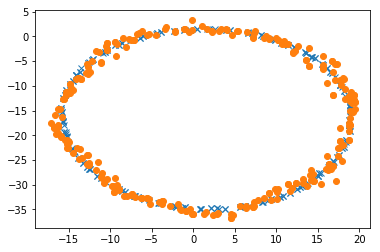

In [41]:
%matplotlib inline
plt.plot(data['outputApplyX'], data['outputApplyY'],'x')
plt.plot(data['targetX'], data['targetY'], 'o')
plt.show()

In [42]:
xtmp = data['outputEvalNopolX'].values.reshape(data['outputEvalNopolX'].values.shape[0],1)
ytmp = data['outputEvalNopolY'].values.reshape(data['outputEvalNopolY'].values.shape[0],1)
xy = np.concatenate((xtmp, ytmp), axis=1)

Xtarget = data['targetX']
Ytarget = data['targetY']

coefs after fit on Y: [  0.00000000e+00  -9.45045543e+00   9.01770806e-01   6.14265999e-03
  -3.95040867e-02  -1.52174298e+00   1.49235519e+02]
coefs after fit on X: [  1.47279937e+00   0.00000000e+00   9.27461454e-01   3.03153796e-02
   9.48875071e-04  -5.83179625e-01   1.58483091e+02]
MSE on X rigig transfo fit:  0.8869525638166645
MSE on X poly fit:  0.9686532498643443
MSE on y rigig transfo fit:  1.4251536472720576
MSE on y poly fit:  1.577576346557701


C:\Users\vdel\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


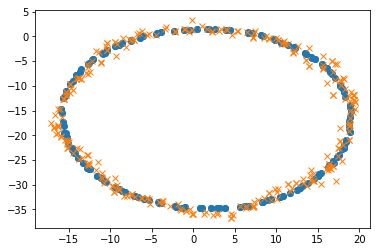

In [44]:
from scipy.optimize import curve_fit

init_vals = [0, 0, 1, 0, 0, 0, 100]
best_valsTotY, covar = curve_fit(transformY, xy, Ytarget, p0=init_vals)
print("coefs after fit on Y:", best_valsTotY)

init_vals = [0, 0, 1, 0, 0, 0, 100]
best_valsTotX, covar = curve_fit(transformX, xy, Xtarget, p0=init_vals)
print("coefs after fit on X:", best_valsTotX)



MSEx = np.mean(np.square(transformX(xy, best_valsTotX[0], best_valsTotX[1], best_valsTotX[2], best_valsTotX[3], best_valsTotX[4], best_valsTotX[5], best_valsTotX[6])-Xtarget))
MSEy = np.mean(np.square(transformY(xy, best_valsTotY[0], best_valsTotY[1], best_valsTotY[2], best_valsTotY[3], best_valsTotY[4], best_valsTotY[5], best_valsTotY[6])-Ytarget))

MSEpolyx = np.mean(np.square(data['outputEvalX']-Xtarget))
MSEpolyy = np.mean(np.square(data['outputEvalY']-Ytarget))

print('MSE on X rigig transfo fit: ', MSEx)
print('MSE on X poly fit: ', MSEpolyx)

print('MSE on y rigig transfo fit: ', MSEy)
print('MSE on y poly fit: ', MSEpolyy)

%matplotlib inline
plt.plot(transformX(xy, best_valsTotX[0], best_valsTotX[1], best_valsTotX[2], best_valsTotX[3], best_valsTotX[4], best_valsTotX[5], best_valsTotX[6]), transformY(xy, best_valsTotY[0], best_valsTotY[1], best_valsTotY[2], best_valsTotY[3], best_valsTotY[4], best_valsTotY[5], best_valsTotY[6]), 'o')
plt.plot(data['targetX'], data['targetY'],'x')
plt.show()

C:\Users\vdel\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


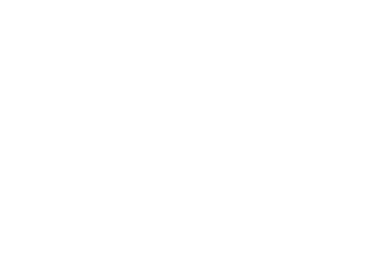

<IPython.core.display.Javascript object>


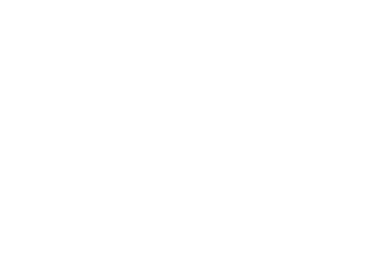

In [46]:
npoint = 20
maxval = 200
xyplot = np.zeros((npoint*npoint,2))


for i in range(0,npoint):
    for j in range(0,npoint):
        xyplot[i*npoint+j,0] = maxval*2/npoint*i-npoint*maxval/npoint
        xyplot[i*npoint+j,1] = maxval*2/npoint*j-npoint*maxval/npoint

#print(xyplot)
#xyplot = np.concatenate((np.arange(-100,100), np.arange(-100,100)), axis=0)

xpredTot = transformX(xyplot, best_valsTotX[0], best_valsTotX[1], best_valsTotX[2], best_valsTotX[3], best_valsTotX[4], best_valsTotX[5], best_valsTotX[6])
ypredTot = transformY(xyplot, best_valsTotY[0], best_valsTotY[1], best_valsTotY[2], best_valsTotY[3], best_valsTotY[4], best_valsTotY[5], best_valsTotY[6])


%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xyplot[:,0], xyplot[:,1], xpredTot, c='r', marker='o')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target X')

ax.scatter(data['outputEvalNopolX'], data['outputEvalNopolY'], data['targetX'], c='b', marker='x')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target X')

plt.show()

<IPython.core.display.Javascript object>


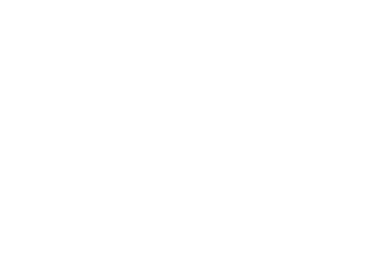

<IPython.core.display.Javascript object>


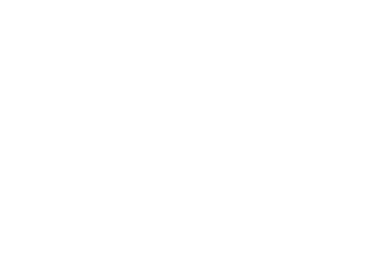

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xyplot[:,0], xyplot[:,1], ypredTot, c='r', marker='o')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target y')

ax.scatter(data['outputEvalNopolX'], data['outputEvalNopolY'], data['targetY'], c='b', marker='x')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target Y')

plt.show()

coeff x poly:  [ 0.          0.92710615 -0.00561216  0.00171779  0.00170619 -0.00160132]
MSExpoly:  0.887104886886
coeff y poly:  [  0.00000000e+00   8.56221268e-03   1.83598722e+00   6.16409806e-02
   5.75638182e-02  -8.38464747e-04]
MSEypoly:  1.38593068739


<IPython.core.display.Javascript object>


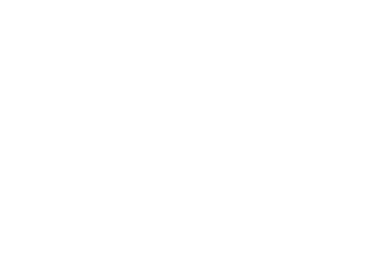

<IPython.core.display.Javascript object>


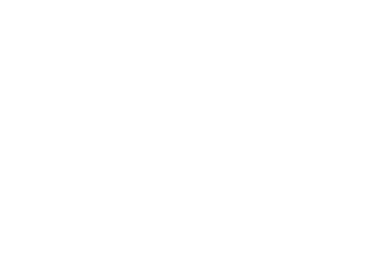

In [50]:
regX = poly2ModelX(data)
xpredTot = regX.coef_[0] + regX.coef_[1]*xyplot[:,0] + regX.coef_[2]*xyplot[:,1]
+ regX.coef_[3]*xyplot[:,0]*xyplot[:,0] + regX.coef_[4]*xyplot[:,1]*xyplot[:,1]
+ regX.coef_[5]*xyplot[:,0]*xyplot[:,1]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xyplot[:,0], xyplot[:,1], xpredTot, c='r', marker='o')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target X')

ax.scatter(data['outputEvalNopolX'], data['outputEvalNopolY'], data['targetX'], c='b', marker='x')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target X')

plt.show()

coeff x poly:  [ 0.          0.92710615 -0.00561216  0.00171779  0.00170619 -0.00160132]
MSExpoly:  0.887104886886
coeff y poly:  [  0.00000000e+00   8.56221268e-03   1.83598722e+00   6.16409806e-02
   5.75638182e-02  -8.38464747e-04]
MSEypoly:  1.38593068739


<IPython.core.display.Javascript object>


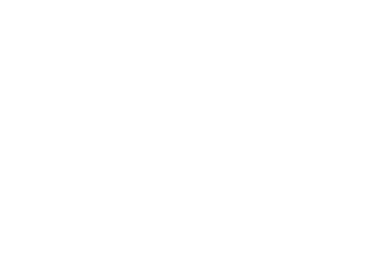

<IPython.core.display.Javascript object>


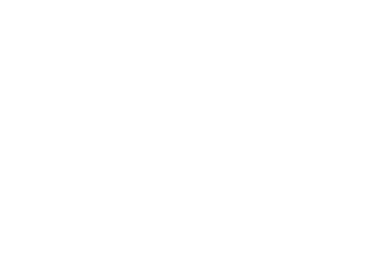

In [51]:
regY = poly2ModelY(data)
ypredTot = regY.coef_[0] + regY.coef_[1]*xyplot[:,0] + regY.coef_[2]*xyplot[:,1]
+ regY.coef_[3]*xyplot[:,0]*xyplot[:,0] + regY.coef_[4]*xyplot[:,1]*xyplot[:,1]
+ regY.coef_[5]*xyplot[:,0]*xyplot[:,1]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xyplot[:,0], xyplot[:,1], ypredTot, c='r', marker='o')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target Y')

ax.scatter(data['outputEvalNopolX'], data['outputEvalNopolY'], data['targetY'], c='b', marker='x')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target Y')

plt.show()